<a href="https://colab.research.google.com/github/merrymira/UPASS_ML_WEEK3/blob/main/UPASS_ML_WEEK9_FeatureReduction_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Practice Problem



# 1. Load and Explore Dataset

Import the pandas, numpy and altair packages

In [1]:
# Solution
import pandas as pd
import numpy as np
import altair as alt

import warnings
warnings.filterwarnings('ignore')

Mounting the drive
In this notebook

Read data from CSV file.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK3/refs/heads/main/data_practice_week9_3.csv', index_col=False)

# 2. Data information

In [3]:
data.shape

(569, 33)

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

In [6]:
# prompt: drop Unnamed: 32

data = data.drop('Unnamed: 32', axis=1)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# 3. Data cleaning

##Drop duplicated records
Found duplicated data 1702 records

In [8]:
# Check for duplicated values and display the count
duplicate_count = data.duplicated().sum()

# Print the number of duplicated values
print("Number of duplicated values in Data set:", duplicate_count)

Number of duplicated values in Data set: 0


In [9]:
num_records = data.shape[0]
print(f"Number of Records before drop duplicated : {num_records}")

data = data.drop_duplicates()
num_records = data.shape[0]
print(f"Number of Records after drop duplicated : {num_records}")

Number of Records before drop duplicated : 569
Number of Records after drop duplicated : 569


###Check Null value in columns
Found Null value in columns

In [10]:
# Check for null values in all columns
null_columns = data.columns[data.isnull().any()]
null_count = data[null_columns].isnull().sum()

if null_count.empty:
    print("No null values found in any column.")
else:
    print("Columns with null values in data set:")
    print(null_count)

No null values found in any column.


In [11]:
# prompt: drop column with null value

# Drop columns with null values
data = data.dropna(axis=1)

# Print the updated DataFrame
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

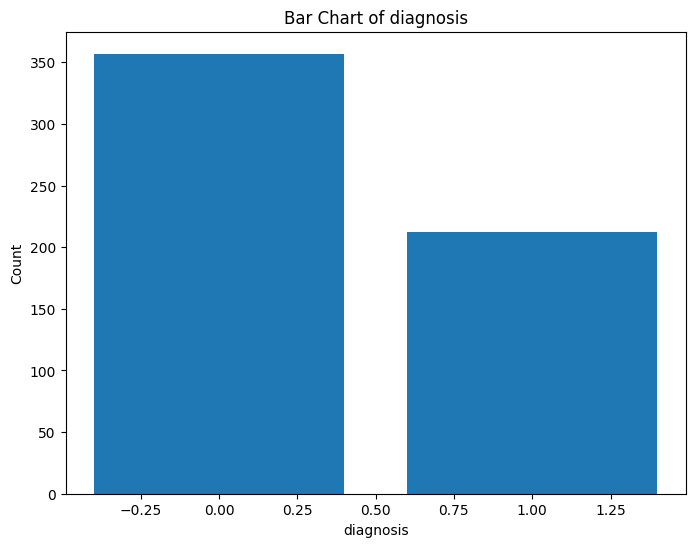

In [12]:
# prompt: plot barchart of the column 'Pass/Fail' use matplotlib to plot

import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the 'Pass/Fail' column
diagnosis_counts = data['diagnosis'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(diagnosis_counts.index, diagnosis_counts.values)
plt.xlabel('diagnosis')
plt.ylabel('Count')
plt.title('Bar Chart of diagnosis')
plt.show()


# 4. Feature Reduction

##(1) Principal Component Analysis (PCA)

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Split the data into features and target variable
X = data.drop([''], axis=1) # Choose columns
y = data[''] # Choose columns

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio
print("Explained Variance Ratio per Component:\n", pca.explained_variance_ratio_)

# Calculate the cumulative sum of the explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of principal components that explain at least 90% of the total variance
# n_components = np.where(cumulative_var_ratio >= 0.90)[0][0] + 1

# Changed the threshold to 0.80 since 0.90 wasn't reached
n_components = np.argmax(cumulative_var_ratio >= 0.80) + 1
# If none of the components reach 0.8, set n_components to the total number of components
n_components = n_components if n_components > 0 else pca.n_components_

# Select the first n_components principal components from the transformed data
X_pca_selected = X_pca[:, :n_components]

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(cumulative_var_ratio, marker='o', label="Cumulative Explained Variance")
plt.axhline(y=0.80, color='r', linestyle='--', label='90% variance')  # Adjust this line to 90% if needed
plt.axvline(x=n_components-1, color='g', linestyle='--', label=f'{n_components} components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Cumulative variance
print("Cumulative Variance:", cumulative_var_ratio)
print('Number of Components (90% variance) = ', n_components)
print('Original Data Shape = ', data.shape)


KeyError: "[''] not found in axis"

**Number of Components (90% variance) = 12**: This means that, after performing PCA, you need 12 principal components to explain at least 90% of the variance in the original data.

**Original Data Shape = (1567, 592)**: This means your original dataset has 21613 samples (rows) and 21 features (columns).


**Interpretation:**

PCA reduces the dimensionality of the data by transforming the original features into new "principal components," which are linear combinations of the original features. These components are ordered by the amount of variance they explain, with the first few components capturing most of the variance in the data.

##(1.1) PCA: Find Top 10 Contributing Features for each component:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only the numerical features for PCA
numerical_features = data.select_dtypes(include=[np.number])

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_features)

# Fit PCA
pca = PCA(n_components=12)  # Set number of components to 12 (the ones explaining 90% variance)
pca.fit(data_scaled)

# Get the PCA components (loadings)
pca_components = pca.components_

# Create a DataFrame to hold the loadings for each component
loadings_df = pd.DataFrame(pca_components.T, index=numerical_features.columns, columns=[f'PC{i+1}' for i in range(12)])

# Find the top contributing features for each principal component
top_contributing_features = {}

# For each principal component, find the top features based on absolute loadings
for i in range(12):
    component = f'PC{i+1}'
    top_features = loadings_df[component].abs().sort_values(ascending=False).head(10)  # Get top 10 features for each component
    top_contributing_features[component] = top_features.index.tolist()

# Display the top contributing features for each component
for pc, features in top_contributing_features.items():
    print(f"Top features contributing to {pc}: {features}")


**Identify the most important features contributing to the first 117 principal components:**


1.   **PCA Loadings (Components Weights):** PCA generates "loadings" that show how much each original feature contributes to each principal component. These loadings are coefficients that map original features to the new principal components.
2.   **Identify the Top Features Based on Loadings:** For each of the 117 principal components, you can rank the original features by their absolute loading values. Features with higher absolute values of loadings contribute more to the component.

##(1.2) PCA Find Unique Features Across All Principal Components:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only the numerical features for PCA
numerical_features = data.select_dtypes(include=[np.number])

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_features)

# Fit PCA
pca = PCA(n_components=12)  # Set number of components to 12 (the ones explaining 90% variance)
pca.fit(data_scaled)

# Get the PCA components (loadings)
pca_components = pca.components_

# Create a DataFrame to hold the loadings for each component
loadings_df = pd.DataFrame(pca_components.T, index=numerical_features.columns, columns=[f'PC{i+1}' for i in range(12)])

# Find the top contributing features for each principal component
distinct_features = set()  # Use a set to keep track of distinct features

# For each principal component, find the top features based on absolute loadings
for i in range(12):
    component = f'PC{i+1}'
    top_features = loadings_df[component].abs().sort_values(ascending=False).head(10).index.tolist()  # Get top 10 features for each component
    distinct_features.update(top_features)  # Add features to the set

# Convert the set of distinct features to a list for easier manipulation
pca_distinct_features = list(distinct_features)

# Print distinct features
print(f"Total number of distinct features: {len(pca_distinct_features)}")
print("Distinct features contributing to the PCs:")
for feature in pca_distinct_features:
    print(feature)


**Total number of distinct features from 12 components: 52**

To identify distinct features contributing to each principal component (PC).


1.   Get distinct features across all principal components.
2.   Avoid duplication: Ensure features contributing to multiple PCs are only listed once.





##(2) Sensitivity Analysis - Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = data.drop([''], axis=1) # Choose columns
y = data[''] # Choose columns

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Calculate mutual information scores
mi_scores = mutual_info_classif(X_train_scaled, y_train)
mi_indices = np.argsort(mi_scores)[::-1]
mi_top_features = X_train.columns[mi_indices[:20]]
print("Top features based on Mutual Information:", mi_top_features)
print("Number of Top features based on Mutual Information:", len(mi_top_features))


In [ ]:
# prompt: mi_top_features drop column 'price'

mi_top_features = mi_top_features.drop('price', errors='ignore')
print("Top features based on Mutual Information (without price):", mi_top_features)
print("Number of Top features based on Mutual Information (without Pass/Fail):", len(mi_top_features))


##(3) Compare the predition performance of a training model on feature sets from PCA and Mutual Information

In [ ]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Using PCA features for training
X_train_pca = X_train_scaled[:, :n_components]
X_test_pca = X_test_scaled[:, :n_components]

# Train a logistic regression model using PCA features
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_pca = model_pca.predict(X_test_pca)

# Evaluate the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)
cm_pca = confusion_matrix(y_test, y_pred_pca)

print("Model with PCA Features:")
print("Accuracy:", accuracy_pca)
print("Precision:", precision_pca)
print("Recall:", recall_pca)
print("F1-score:", f1_pca)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Fail', 'Predicted Pass'],
            yticklabels=['Actual Fail', 'Actual Pass'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Mutual Information Features")
plt.show()


# Using Mutual Information features for training
X_train_mi = X_train[mi_top_features]
X_test_mi = X_test[mi_top_features]

# Train a logistic regression model using Mutual Information features
model_mi = LogisticRegression()
model_mi.fit(X_train_mi, y_train)

# Predict on the test set
y_pred_mi = model_mi.predict(X_test_mi)

# Evaluate the model
accuracy_mi = accuracy_score(y_test, y_pred_mi)
precision_mi = precision_score(y_test, y_pred_mi)
recall_mi = recall_score(y_test, y_pred_mi)
f1_mi = f1_score(y_test, y_pred_mi)
cm_mi = confusion_matrix(y_test, y_pred_mi)

print("\nModel with Mutual Information Features:")
print("Accuracy:", accuracy_mi)
print("Precision:", precision_mi)
print("Recall:", recall_mi)
print("F1-score:", f1_mi)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mi, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Fail', 'Predicted Pass'],
            yticklabels=['Actual Fail', 'Actual Pass'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Mutual Information Features")
plt.show()
